In [1]:
# Importing Libraries
# To import necessary libraries for this task, execute the following import statements:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# The following command imports the CSV dataset using pandas:

dataset = pd.read_csv("/home/garv/Desktop/student_scores.csv")

In [5]:
# Now let's explore our dataset a bit. To do so, execute the following script:

dataset.shape

(25, 2)

In [6]:
# This means that our dataset has 25 rows and 2 columns. Let's take a look at what our dataset
# actually looks like. To do this, use the head() method:

# The above method retrieves the first 5 records from our dataset, which will look like this:

dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
# To see statistical details of the dataset, we can use describe():

dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


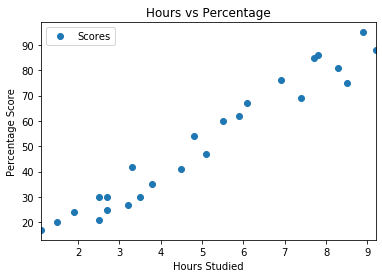

In [13]:
# And finally, let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any
# relationship between the data. We can create the plot with the following script:

# The resulting plot will look like this:

dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [14]:
# Preparing the Data

# The next step is to divide the data into "attributes" and "labels".

# Therefore our attribute set will consist of the "Hours" column, and the label will be the "Score" column.
# To extract the attributes and labels, execute the following script:

x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values

In [15]:
# Now that we have our attributes and labels, the next step is to split this data into training and test sets. 
# We'll do this by using Scikit-Learn's built-in train_test_split() method:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [16]:
# Training the Algorithm

# We have split our data into training and testing sets, 
# and now is finally the time to train our algorithm. Execute following command:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# To retrieve the intercept:

print(regressor.intercept_)

2.018160041434683


In [18]:
# For retrieving the slope (coefficient of x):

print(regressor.coef_)

[9.91065648]


In [19]:
# Making Predictions

# Now that we have trained our algorithm, it's time to make some predictions.
# To do so, we will use our test data and see how accurately our algorithm predicts the percentage score.
# To make pre-dictions on the test data, execute the following script:

y_pred = regressor.predict(x_test)

In [20]:
# To compare the actual output values for X_test with the predicted values, execute the following script:

df = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [21]:
# Evaluating the Algorithm

# Let's find the values for these metrics using our test data. Execute the following code:

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
